**Цель работы:** изучение алгоритмов и методов классификации на практике.

# Основная часть

**Вариант 1** 
Набор данных - medical_diagnosis.csv
Данные содержат информацию о болезнях.

age — возраст пациента (лет), числовой.

sex — пол: Male / Female, категориальный.

BMI — индекс массы тела (кг/м²), числовой.

systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.

cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.

fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.

smoking_status — статус курения: Never / Former / Current, категориальный.

family_history — наследственность по заболеванию: Yes / No, категориальный.

activity_level — уровень физической активности: Low / Moderate / High, категориальный.

symptom_score — суммарная выраженность симптомов (0–10), числовой.

CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.

WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.

ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH, категориальный.

Disease — целевой класс: 1 — болеет, 0 — не болеет.


Был загружен датасет и выведены первые 20 строк. Данные содержат информацию о том, болен человек или нет

In [1]:
import pandas as pd
df = pd.read_csv("medical_diagnosis.csv")
df.head(20)


,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0
5,43,Male,13.5,136.0,171.0,91.0,Never,No,Low,1.3,0.10,5.05,ST-T abnormality,0
6,76,Female,26.2,110.0,269.0,140.0,Current,Yes,Moderate,2.7,2.92,7.91,ST-T abnormality,0
7,24,Female,30.0,162.0,189.0,112.0,Never,Yes,High,2.1,0.80,7.71,LVH,0
8,83,Male,25.7,107.0,215.0,110.0,Never,No,Moderate,2.7,2.60,9.17,Normal,0
9,41,Female,21.5,156.0,188.0,120.0,Never,No,High,1.1,0.10,10.15,Normal,0


Произведена предварительная обработка данных. Для оценки данных использовался метод info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

Затем произведено удаление явных дубликатов

In [3]:
df[df.duplicated()]

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
3024,49,Female,27.5,133.0,438.6,91.0,Former,No,Moderate,1.9,25.04,12.61,Normal,0


In [4]:
df = df.drop_duplicates().reset_index(drop=True)

Для поиска неявных дубликатов применятся метод unique, который выводит уникальные значения.

In [5]:
for x in df.columns:
  print (x, ":", "\n", df[x].unique(),"\n" )

age : 
 [34 24 19 89 66 43 76 83 41 87 30 80 50 86 84 26 18 38 58 55 69 63 60 21
 32 56 74 45 39 67 78 49 81 68 28 33 47 88 44 52 46 27 79 64 54 62 82 36
 73 85 65 61 77 57 22 75 35 20 53 29 70 23 31 42 37 25 72 59 71 51 40 48] 

sex : 
 ['Male' 'Female'] 

BMI : 
 [16.8 29.2 16.5 15.4 16.7 13.5 26.2 30.  25.7 21.5 36.2 32.8 24.4 29.6
 25.6 19.6 27.6 15.1 30.1 33.  31.  24.2 29.1 33.8 26.4 20.  20.4 17.2
 25.3 20.5 20.8 18.  22.  35.2 17.7 30.6 35.  23.8 33.9 23.5 25.8 31.8
 19.5 23.4 31.5 25.5 21.2 25.  37.6 29.5 23.  40.4 39.1 26.9 22.7 32.1
 22.3 23.7 29.4 30.3 29.8 26.6 33.1 30.7 29.7 24.3 31.3 34.3 28.9 27.8
 21.4 29.3 30.5 28.6 21.3 25.2 28.  34.2 30.8 26.7 25.9 24.9 31.1 31.7
 20.1 35.4 40.6 27.2 19.8 20.6 23.1 35.6 36.  27.3 26.5 39.4 28.3 14.3
 34.9 27.  37.4 18.3 27.1 21.6 24.7 17.1 19.4 21.8 15.  22.4 19.9 20.3
 14.4 27.5 33.3 22.9 23.9 14.6 24.  18.7 42.2 23.6 22.2 30.2 40.9 28.1
 28.2 28.5 32.6 28.7 16.2 24.8 37.2 26.  32.  29.  21.  23.2 14.5 30.9
 17.9 31.4 18.1 32.3 35.

Целевой переменной выбран столбец Disease, который показывает есть ли у пациента болезнь, или нет. Построена матрица диаграмм рассеяния по некоторым количественнным стобцам

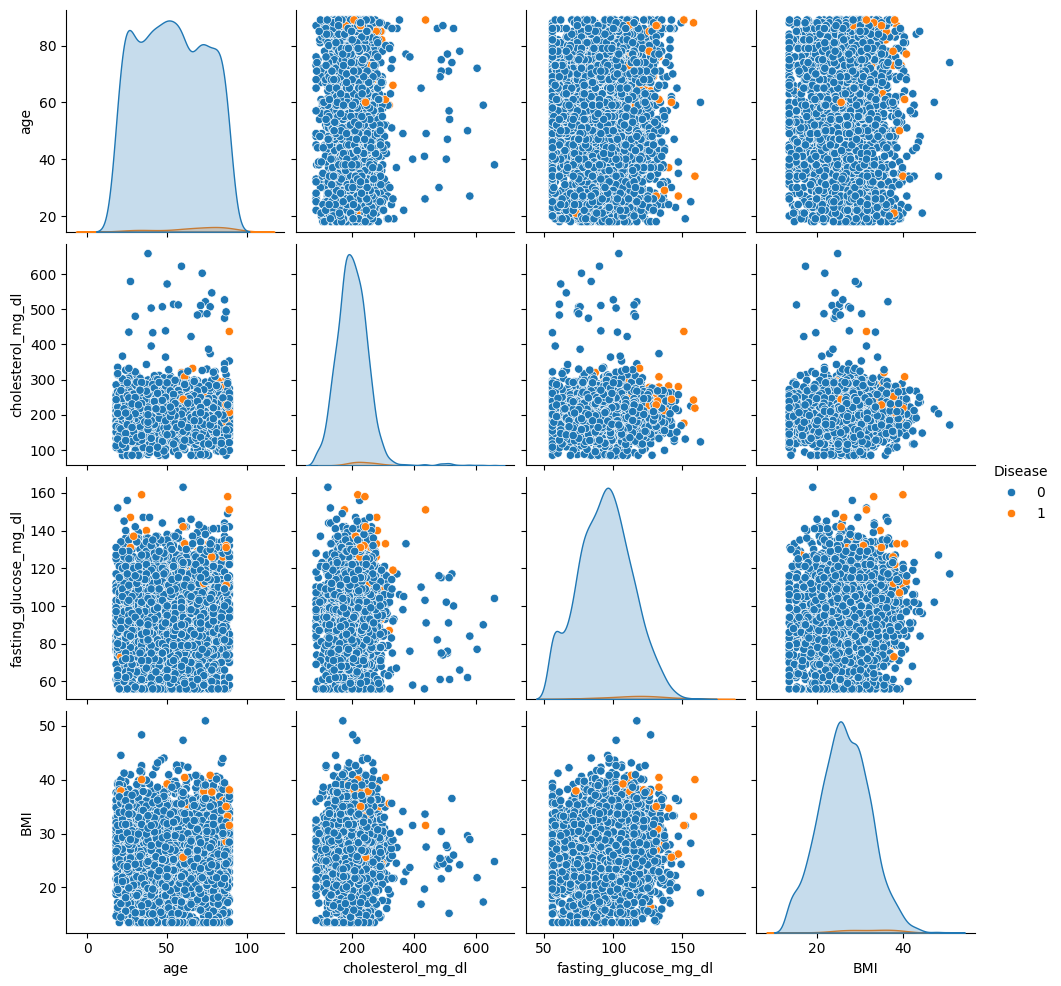

In [6]:
import seaborn as sns
sns.pairplot(df[['age','cholesterol_mg_dl','fasting_glucose_mg_dl','BMI', 'Disease']], hue='Disease')

В датасете есть не только числовые, но и категориальные данные. Для преобразования категориальных данных в числовые использовалось порядковое кодирование. Используется этот тип кодирования для преобразования качественных переменных в количественные (Ordinal Encoding). Каждому новому значению
признака присваивается новая метка, обычно это числа от 0 до N-1, где N - количество уникальных значений признака.

In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])
df


,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,1.0,16.8,132.0,196.0,78.0,0.0,0.0,0.0,0.2,0.58,8.60,1.0,0
1,24,0.0,29.2,118.0,182.0,96.0,0.0,0.0,2.0,3.2,2.72,6.54,1.0,0
2,19,0.0,16.5,121.0,268.0,101.0,0.0,0.0,2.0,3.8,0.18,6.61,1.0,0
3,89,0.0,15.4,117.0,136.0,96.0,2.0,0.0,1.0,2.6,1.83,5.67,1.0,0
4,66,1.0,16.7,82.0,241.0,126.0,1.0,0.0,2.0,3.5,1.16,2.66,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,40,0.0,27.8,119.0,503.4,102.0,0.0,0.0,2.0,0.0,24.48,7.80,2.0,0
3026,57,0.0,15.2,158.0,512.4,115.0,2.0,1.0,1.0,3.1,24.27,6.51,0.0,0
3027,41,1.0,19.7,133.0,433.2,56.0,1.0,1.0,2.0,0.0,20.35,8.20,1.0,0
3028,75,1.0,30.4,94.0,487.2,75.0,1.0,0.0,2.0,1.4,33.09,8.11,1.0,0


С помощью train_test_split данные разделены на тренировочный и тестовый датасеты.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df.drop('Disease', axis=1), df['Disease'], test_size=0.30, random_state=42)

Выполнена стандартизация числовых данных с помощью StandardScaler. Стандартизация преобразует данные таким образом, что их математическое ожидание равно 0, а стандартное отклонение равно 1 Для этого из исходного значения признака вычитается среднее, и эта разность делится на стандартное отклонение. Таким образом, данные имеют вид стандартного нормального распределения, что позволяет минимизировать среднеквадратичную ошибку.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


DecisionTreeClassifier - это классификатор, который строит модель на основе дерева решений для задачи классификации. Он использует структуру дерева, чтобы принимать решения о классе объектов на основе их признаков. При обучении дерева решений он ищет лучшие признаки из доступного набора для разделения данных на части, минимизируя некоторый критерий неопределенности . Это процесс построения дерева, в котором каждый узел представляет собой признак, каждая ветвь - возможное значение этого признака, а каждый лист - конечный прогноз или класс объекта.

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier() # создание объекта структуры дан-ных
dt_model.fit(X_train, y_train)# запуск обучения

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
dt_pred = dt_model.predict(X_test)

Метод k-ближайших соседей присваивает новому наблюдению класс или значение, исходя из классов или значений его ближайших соседей в обучающем наборе данных. Чтобы избежать ничьей в голосовании для классификации, берется нечетное значение k. Разработана модель классификации методом k-ближайших соседей с параметром n_neighbors=5. Выполнено предсказание классов на тестовых данных.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
knn_pred= knn_model.predict(X_test)

LogisticRegression опирается на логистическую функцию (или сигмоиду), которая преобразует выход модели в вероятность принадлежности к определенному классу. При обучении модели находятся оптимальные веса (коэффициенты) для каждого произведено обучение модели логистической регрессии. max_iter=500 устанавливает максимальное количество итераций оптимизационного алгоритма для обучения модели. Этот параметр указывает на количество итераций, которые алгоритм может выполнить для нахождения оптимальных коэффициентов модели.

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

c:\Users\polin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [15]:
lr_pred = lr_model.predict(X_test)

RandomForestClassifier - это алгоритм машинного обучения, основанный на методе "случайного леса" для задач классификации. Этот метод построения модели использует ансамбль деревьев решений, комбинирует прогнозы нескольких деревьев решений для достижения более точного и стабильного результата.

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
rf_pred = rf_model.predict(X_test)

Для оценки классификации посчитаны метрики для всех методов. Accuracy (доля правильных ответов)-это показатель общей точности модели,она означает отношение числа верных прогнозов к общему количеству прогнозов. Precision (точность) помогает оценить, сколько из предсказанных положительных случаев действительно верны. Recall (полнота) помогает оценить, сколько положительных случаев модель способна найти среди всех фактических положительных случаев. Сбалансированная точность (Balanced Accuracy) - это метрика оценки качества модели, которая учитывает дисбаланс классов в данных. Эта метрика является средним значением Recall для каждого класса. F1 Score является сбалансированным показателем, который учитывает и precision, и recall. Он представляет собой гармоническое среднее между этими двумя метриками.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_balanced_accuracy = balanced_accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_balanced_accuracy = balanced_accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_balanced_accuracy = balanced_accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_balanced_accuracy = balanced_accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)



data = {
     'Accuracy': [knn_accuracy, dt_accuracy, lr_accuracy, rf_accuracy],
    'Precision': [knn_precision, dt_precision, lr_precision, rf_precision],
   'Recall': [knn_recall, dt_recall, lr_recall, rf_recall],
    'Balanced Accuracy': [knn_balanced_accuracy, dt_balanced_accuracy, lr_balanced_accuracy, rf_balanced_accuracy],
    'F1 Score': [knn_f1, dt_f1, lr_f1, rf_f1]
}

m_df = pd.DataFrame(data, index=['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest'])
m_df


c:\Users\polin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Accuracy,Precision,Recall,Balanced Accuracy,F1 Score
KNN,0.975798,0.000000,0.000000,0.500000,0.000000
Decision Tree,0.972497,0.384615,0.227273,0.609127,0.285714
Logistic Regression,0.979098,0.800000,0.181818,0.590345,0.296296
Random Forest,0.979098,1.000000,0.136364,0.568182,0.240000


Logistic Regression и Random Forest демонстрируют наивысшую точность по сравнению с остальными моделями. Decision Tree также показывает хороший уровень точности, но немного ниже, чем у Logistic Regression и Random Forest. KNN имеет наименьшую точность среди всех моделей.

По метрике Precision Logistic Regression и Random Forest имеют самую высокую точность , что указывает на их способность к предсказанию положительных классов с высокой точностью. KNN также имеет наименьшую точность по сравнению с другими моделями.

Decision Tree демонстрирует наивысший уровень Recall (полноты), что означает, что он лучше всего находит все истинные положительные примеры. Logistic Regression также показывает хороший уровень полноты, близкий к значению Decision Tree. KNN имеет наименьшую полноту.

Значения сбалансированной точности почти соответствуют значениям Recall. Это показывает, что у моделей нет значительных различий в способности различать классы при дисбалансе данных.

F1 Score характеризует сбалансированность между Precision и Recall. Decision Tree имеет самый высокий F1 Score, что свидетельствует о его способности сохранять хороший баланс между Precision и Recall.

С помощью confusion_matrix построена матрица неточностей для каждого метода и визуализирована в виде тепловой карты с использованием библиотеки seaborn, где параметр annot=True указывает, что нужно отображать числовые значения внутри карты. В такой карте каждая ячейка представляет комбинацию реальных и предсказанных классов.

Для задачи классификации матрица неточночтей имеет следующую структуру:

True Positives (TP)- количество верно предсказанных положительных случаев (правый нижний квадрат) True Negatives (TN)- количество верно предсказанных отрицательных случаев (левый верхний квадрат). False Positives (FP) - количество ошибочно предсказанных положительных случаев (правый верхний квадрат). False Negatives (FN)- количество ошибочно предсказанных отрицательных случаев (левый нижний квадрат).

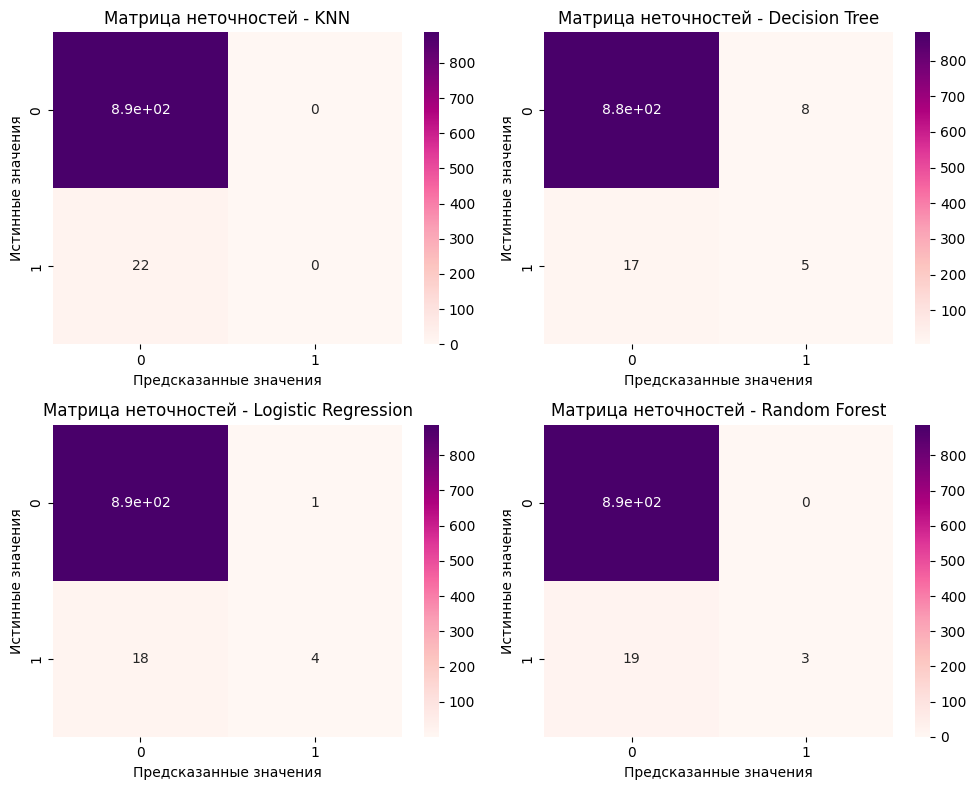

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_knn = confusion_matrix(y_test, knn_pred)
cm_dt = confusion_matrix(y_test, dt_pred)
cm_lr = confusion_matrix(y_test, lr_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(cm_knn, annot=True, cmap='RdPu')  
plt.title('Матрица неточностей - KNN')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

plt.subplot(2, 2, 2)
sns.heatmap(cm_dt, annot=True, cmap='RdPu')
plt.title('Матрица неточностей - Decision Tree')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

plt.subplot(2, 2, 3)
sns.heatmap(cm_lr, annot=True, cmap='RdPu')
plt.title('Матрица неточностей - Logistic Regression')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

plt.subplot(2, 2, 4)
sns.heatmap(cm_rf, annot=True, cmap='RdPu')
plt.title('Матрица неточностей - Random Forest')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

plt.tight_layout() 
plt.show()

Decision Tree показывает наилучшее значение TP, что указывает на его способность лучше всего обнаруживать положительные случаи.

Random Forest имеет самое маленькое значение FP, это может указывать на его относительно лучшую способность предсказывать негативные случаи. Decision Tree показывает самое большое значение FP среди других моделей, это может указывать на то, что KNN склонен делать больше ошибок, предсказывая положительный класс, когда он на самом деле отрицательный.

KNN имеет самый высокий уровень FN, это означает, что он чаще ошибочно предсказывает негативный класс как положительный.

Logistic Regression, KNN, Random Forest имеют самое высокое значение TN, значит они чаще всего правильно предсказывают негативные случаи как негативные.

Построены графики ROC-кривой для каждого метода. Идеальная модель будет иметь ROC-кривую, которая стремится к верхнему левому углу графика. Это означает, что модель имеет высокую чувствительность (TPR = 1) и низкий FPR (FPR = 0) при любых значениях порога. Функция roc_curve из библиотеки sklearn.metrics, вычисляет значения False Positive Rate и True Positive Rate для модели KNN. Auc вычисляет площадь под ROC-кривой для каждой модели, что является метрикой для сравнения производительности моделей, чем выше AUC, тем лучше модель разделяет классы.. График отображает ROC-кривые для каждой модели, а также линию случайного предположения (Random Guessing), которая представляет собой прямую диагональ от (0,0) до (1,1).

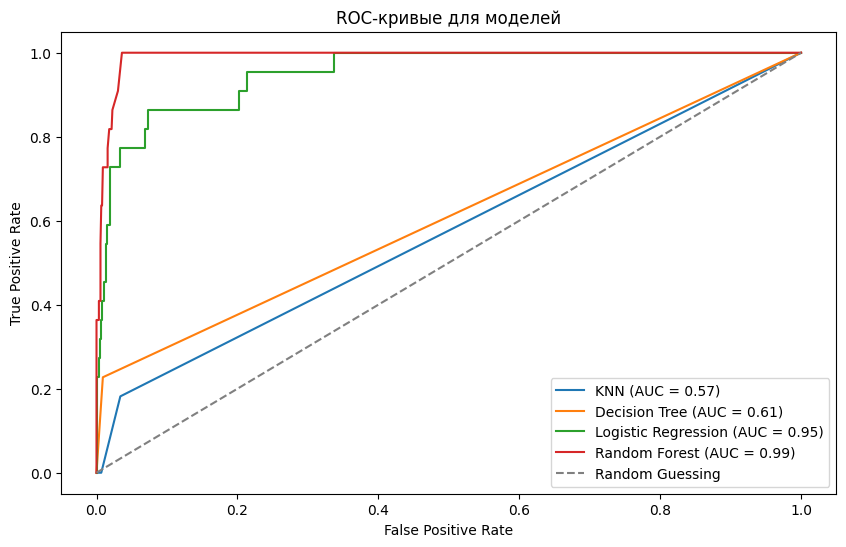

In [20]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей')
plt.legend()
plt.show()

KNN (AUC=0.57) модель KNN имеет самый низкий AUC по сравнению с другими моделями. KNN имеет самую слабую способность разделять классы, но есть возможность улучшить ее точность. Кривая KNN ближе всего к случайному предсказыванию.

Decision Tree (AUC = 0.63): Эта модель имеет AUC больше, чем KNN.

Logistic Regression и Random Forest имет AUC=0.95 и AUC=0.99, это говорит об отличной способности различия классов. Их кривые проходят близко к левому верхнему углу, значит при высоком TPR низкий FPR, модели обнаруживают положительные случаи с высокой точностью и минимизируют ложноположительные результаты.

# Вывод

Проведен анализ четырех моделей классификации K-Nearest Neighbors, Decision Tree, Logistic Regression и Random Forest на основе набора данных о сердечных заболеваниях. Для оценки методов рассчитаны метрики, построены матрицы неточностей в виде тепловой карты и построены ROC-кривые.

Random Forest и Logistic Regression показали лучшие результаты по всем оценкам,это говорит о высокой точности и эффективности этих моделей в решении задачи классификации на основе данных о сердечных заболеваниях. Метод K-Nearest Neighbors показал самые низкие метрики оценки качества классификации по сравнию с другими моделями.